In [72]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
paris_data = pd.read_csv("full_paris_emolex.csv")
gnd_data = pd.read_csv("full_gnd_emolex.csv")

In [74]:

paris_data["created_at"] = pd.to_datetime(paris_data["created_at"])

mm = paris_data.groupby('created_at').agg({'id_str': 'count' , 'positive' : 'mean', 'negative': 'mean'})

In [75]:

#resample by "W" for week or "M" for Month 
n = mm.resample('W').agg({'id_str': 'count' , 'positive' : 'mean', 'negative': 'mean'})

n.head(22)

#if you want it to have connections between tweets 
n = n.dropna()

In [78]:
def plot_multi(data, cols=None, spacing=.1, **kwargs):

    from pandas import plotting

    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    colors = getattr(getattr(plotting, '_matplotlib').style, '_get_standard_colors')(num_colors=len(cols))

    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=cols[0])
    lines, labels = ax.get_legend_handles_labels()
    
    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], **kwargs)
        ax_new.set_ylabel(ylabel=cols[n])

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    plt.title('Paris Agreement Number of Tweets and Average Sentiment Aggregated over a Week')
    ax.legend(lines, labels, loc=0)
    return ax

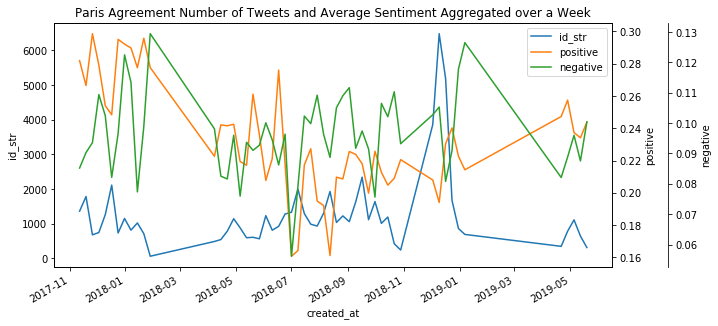

In [79]:
from random import randrange

data = pd.DataFrame(dict(
    s1=[randrange(-1000, 1000) for _ in range(100)],
    s2=[randrange(-100, 100) for _ in range(100)],
    s3=[randrange(-10, 10) for _ in range(100)],
))

plot_multi(n, figsize=(10, 5))

In [82]:
n['num_tweets'] = n['id_str']
n['average_sentiment'] = (n['positive'] + -n['negative'])/2

dd = n[['num_tweets','average_sentiment']]




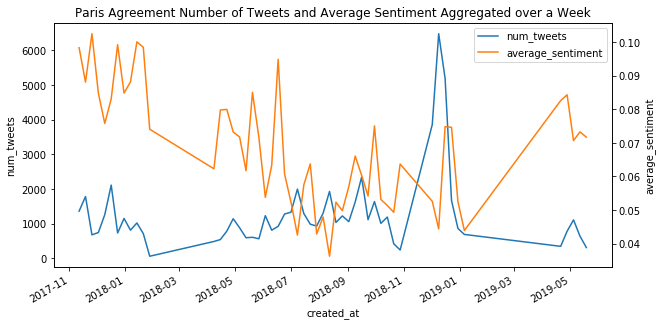

In [83]:
plot_multi(dd, figsize=(10, 5))